In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [189]:
plt.rcParams['figure.figsize'] = [14, 8]

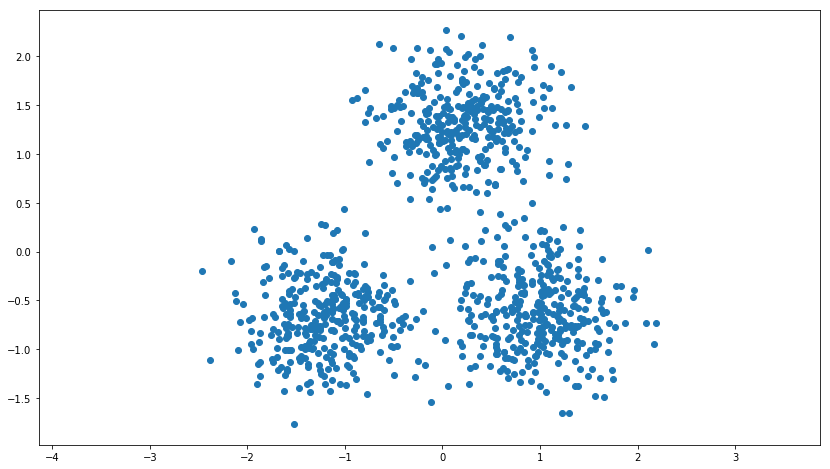

In [202]:
centers = [[5, 5], [-5, -10], [10, -10]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=3,
                            random_state=0)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
# plt.xlim(0, 10)
# plt.ylim(0, 10)
plt.show()

https://github.com/chrisjmccormick/dbscan/blob/master/dbscan.py
1. ใส่ label ทุกจุดว่ายังไม่ได้ตรวจสอบ (label=0)
2. หาจำนวนจุดที่ใกล้กับแต่ละจุด (ภายใน eps)
3. ถ้าหากจำนวนจุดที่อยู่ใกล้น้อยกว่าค่าที่กำหนดไว้ (neighborpoint < minpoints) ให้ label ว่าเป็น noise (label=-1)
4. ถ้าหากจำนวนจุดที่อยู่ใกล้มากกว่าค่าที่กำหนดไว้ (neighborpoint > minpoints) ให้ label ว่าเป็น cluster (label>0)
4.1 หา neighbor ของ neighbor แล้วให้นับเป็น cluster เดียวกัน

In [203]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [204]:
def neighbors(points, p, eps):
    nbs = []
    for i in range(len(points)):
        if distance(points[p], points[i]) < eps:
            nbs.append(i)
    return nbs

In [205]:
def extend_cluster(points, nbs, labels, c, eps):
    i = 0
    while i <len(nbs):
        nb = nbs[i]
        if labels[nb] == -1:
            labels[nb] = c
        elif labels[nb] == 0:
            labels[nb] = c
            nb_of_nb = neighbors(points, nb, eps)
            if len(nb_of_nb) >= eps:
                nbs += nb_of_nb
        i+=1

In [232]:
# X = np.array([x, y]).T
minpoints = 10
eps = 0.2
labels = [0] * X.shape[0]
cluster = 0
for i in range(X.shape[0]):
    nbs = neighbors(X, i, eps)
    if len(nbs) < minpoints:
        labels[i] = -1
    elif labels[i] == 0:
        cluster += 1
        labels[i] = cluster
        extend_cluster(X, nbs, labels, cluster, eps)

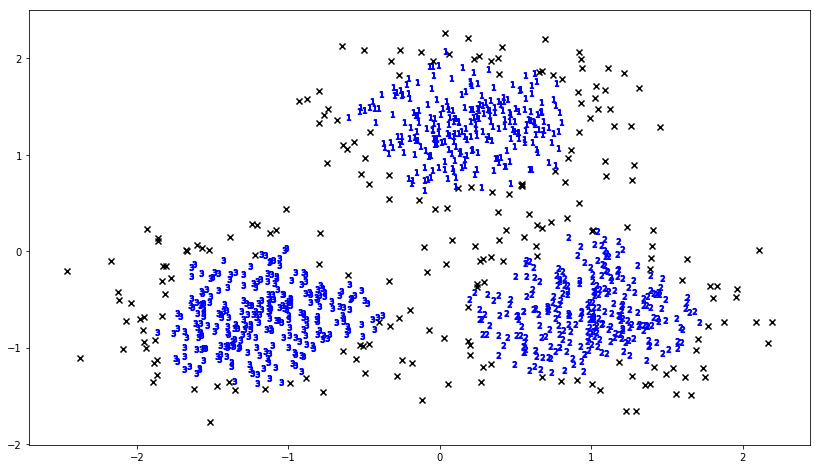

In [233]:
for i in range(len(labels)):
    if labels[i] == -1:
        plt.scatter(X[i:i+1,0], X[i:i+1,1], marker="x", c="black")
    else:
        plt.scatter(X[i:i+1,0], X[i:i+1,1], marker="$"+str(labels[i])+"$", c="blue")
plt.show()

In [234]:
from sklearn.cluster import DBSCAN

In [235]:
db = DBSCAN(eps=eps, min_samples=minpoints).fit(X)
skl_labels = db.labels_

In [236]:
for i in range(len(skl_labels)):
    if skl_labels[i] != -1:
        skl_labels[i] += 1


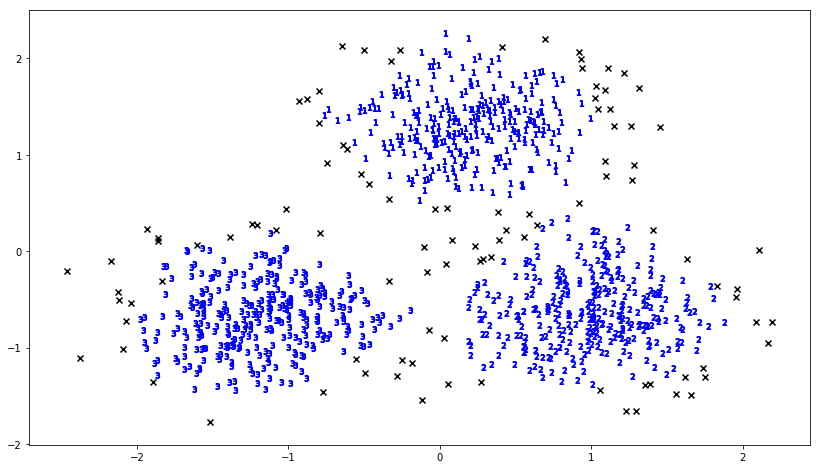

In [237]:
for i in range(len(skl_labels)):
    if skl_labels[i] == -1:
        plt.scatter(X[i:i+1,0], X[i:i+1,1], marker="x", c="black")
    else:
        plt.scatter(X[i:i+1,0], X[i:i+1,1], marker="$"+str(skl_labels[i])+"$", c="blue")
plt.show()

In [239]:
same = 0
for i in range(len(labels)):
    if labels[i] == skl_labels[i]:
        same += 1
print(same/len(labels) * 100)

88.8
